# **Détection de visages à partir d'une image ou d'une vidéo (stream)**
---
---
La détection des visages consiste à identifier le visage d'une personne dans une image ou une vidéo. Ainsi, il faudra analyser le contenu visuel afin de déterminer si les caractéristiques d'un visage d'une personne sont présents ou pas.

Les visages humains sont très variés (personnes d'origines, de sexes et de cultures différents). Les apporoches ML supervisées de détection des visages doivent être entraînés sur de larges quantités de données d'entrée pour pouvoir se généraliser sur de nouvelles données.

D'autre part, les approches proposées doivent être robustes aux différents types d'éclairage, aux transformations géométriques, etc.  Par conséquent, on augmente souvent les datasets d'apprentissage par des données vérifiant ces hypothèses.

Dans le cadre de TP, nous allons utiliser une implémentation OpenCV de la méthode de cascade de Haar qui est un modèle supervisé pré-entrainé.

**Méthode de casacde de Haar**

---



Cette méthode a été intrduite par Paul Viola et M.ichael Jones en 2001, [www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf](www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) [1].
L'idée principale de cette méthode consiste à utiliser une cascade de classificateurs pour détecter les différentes caractéristiques d'une image. Ces classificateurs sont ensuite combinés en un classificateur fort capable de distinguer avec précision les échantillons contenant un visage humain de ceux qui n'en contiennent pas.

Le classificateur Haar Cascade implémenté dans OpenCV est pré-entrainé sur un large ensemble de données de visages humains. Ainsi, il n'est pas nécessaire de le re-entrainer. Il suffit de charger le classificateur à partir de la bibliothèque et de l'utiliser pour détecter les visages sur une image d'entrée.



**Référence**
[1] P. Viola and M. Jones, "Rapid object detection using a boosted cascade of simple features," Proceedings of the 2001 IEEE Computer Society Conference on Computer Vision and Pattern Recognition. CVPR 2001, Kauai, HI, USA, 2001, pp. I-I, doi: 10.1109/CVPR.2001.990517.

## ***Question 1- Lire une image contenant un visage***

## Importer les librairies
OpenCV, Numpy, Matplotlib

In [1]:
!pip install opencv-python==4.8.1.78 numpy==1.24.4 matplotlib==3.7.1

import cv2
import numpy as np
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-1.24.4.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "D:\anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "D:\anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "D:\anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "D:\anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^^^^^^^^^^^
    File "D:\anaconda\Lib\importlib\__init__.py",

## Charger et afficher l'image

Dimensions de l'image : (683, 1024, 3)


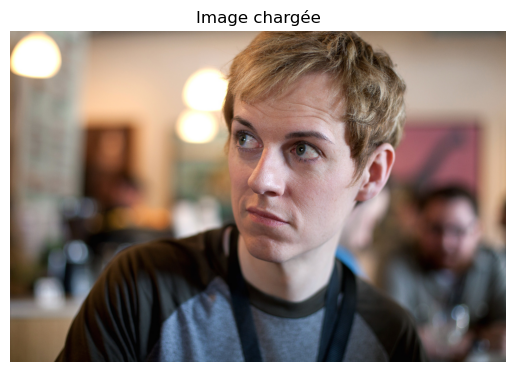

In [2]:
# Lire et afficher l'image
ImNom = "visage.jpg"
img = cv2.imread(ImNom)

# Vérifier si l'image est bien chargée
if img is None:
    print("Erreur : image non trouvée.")
else:
    print("Dimensions de l'image :", img.shape)
    # Convertir BGR vers RGB pour affichage avec matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Image chargée")
    plt.show()

## Convertir l'image en niveaux de gris

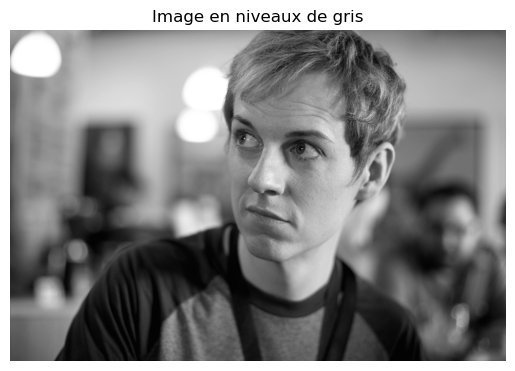

In [3]:
# Convertir l'image en niveaux de gris
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Afficher l'image en niveaux de gris
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title("Image en niveaux de gris")
plt.show()


## Instancier et charger le classifieur CascadeClassifier

In [4]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

## Appliquer le classifieur

In [5]:
face = face_classifier.detectMultiScale(
    img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

## Dessiner une boite englobante

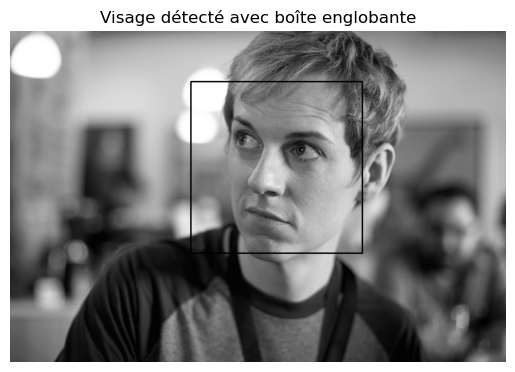

In [6]:
# Dessiner les boîtes englobantes
for (x, y, w, h) in face:
    cv2.rectangle(img_gray, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Afficher le résultat
img_with_box = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
plt.imshow(img_with_box)
plt.axis('off')
plt.title("Visage détecté avec boîte englobante")
plt.show()

ReConvertir l'image ---> Image couleur et afficher l'image

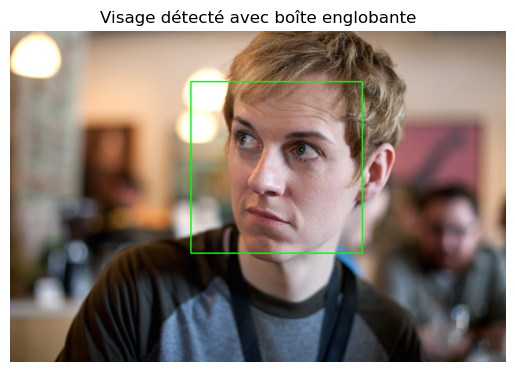

In [7]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Afficher le résultat
img_with_box = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_with_box)
plt.axis('off')
plt.title("Visage détecté avec boîte englobante")
plt.show()

## Lire à partir de la WebCam

In [ ]:
'''# Lire à partir de la WebCam
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(
        gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Détection de visage (WebCam)", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()'''

## Evaluation

In [ ]:
def compute_iou(boxA, boxB):
    # Convertir en (x1, y1, x2, y2)
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou